# Importing libiraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import auc

warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
file_path = 'nipah_virus.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset

In [3]:
df.head()

,ID,Age,Gender,Income,Education_Level,Marital_Status,Occupation,Location,Spending_Score,Credit_Score,Virus_Affected
0,1,56,Male,65648,High School,Single,Manager,Rural,93,451,1
1,2,69,Male,123537,PhD,Single,Unemployed,Rural,47,630,0
2,3,46,Male,145991,PhD,Single,Student,Suburban,76,837,1
3,4,32,Female,29516,PhD,Married,Professional,Rural,30,682,0
4,5,60,Male,132863,PhD,Married,Unemployed,Rural,23,414,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               1000 non-null   int64 
 1   Age              1000 non-null   int64 
 2   Gender           1000 non-null   object
 3   Income           1000 non-null   int64 
 4   Education_Level  1000 non-null   object
 5   Marital_Status   1000 non-null   object
 6   Occupation       1000 non-null   object
 7   Location         1000 non-null   object
 8   Spending_Score   1000 non-null   int64 
 9   Credit_Score     1000 non-null   int64 
 10  Virus_Affected   1000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 86.1+ KB


# Check for missing values

In [5]:
df.isnull().sum()

ID                 0
Age                0
Gender             0
Income             0
Education_Level    0
Marital_Status     0
Occupation         0
Location           0
Spending_Score     0
Credit_Score       0
Virus_Affected     0
dtype: int64

# Convert categorical variables to numerical using Label Encoding

In [6]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# After converting categorical features, fill missing values with the mean

In [7]:
df.fillna(df.mean(), inplace=True)

# Confirm that there are no missing values left

In [8]:
df.isnull().sum()

ID                 0
Age                0
Gender             0
Income             0
Education_Level    0
Marital_Status     0
Occupation         0
Location           0
Spending_Score     0
Credit_Score       0
Virus_Affected     0
dtype: int64

# Exploratory Data Analysis (EDA)

In [9]:
df.describe()

,ID,Age,Gender,Income,Education_Level,Marital_Status,Occupation,Location,Spending_Score,Credit_Score,Virus_Affected
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.81900,0.524000,87130.677000,1.508000,1.019000,1.480000,0.956000,49.711000,573.037000,0.644000
std,288.819436,14.99103,0.499674,38333.193443,1.142472,0.829051,1.104001,0.815309,28.465484,159.045582,0.479055
min,1.000000,18.00000,0.000000,20207.000000,0.000000,0.000000,0.000000,0.000000,1.000000,300.000000,0.000000
25%,250.750000,31.00000,0.000000,52723.250000,0.000000,0.000000,0.000000,0.000000,25.000000,431.000000,0.000000
50%,500.500000,44.00000,1.000000,88482.000000,1.000000,1.000000,2.000000,1.000000,48.000000,568.500000,1.000000
75%,750.250000,56.00000,1.000000,121396.750000,3.000000,2.000000,2.000000,2.000000,75.000000,714.000000,1.000000
max,1000.000000,69.00000,1.000000,149839.000000,3.000000,2.000000,3.000000,2.000000,99.000000,849.000000,1.000000


# Visualizations

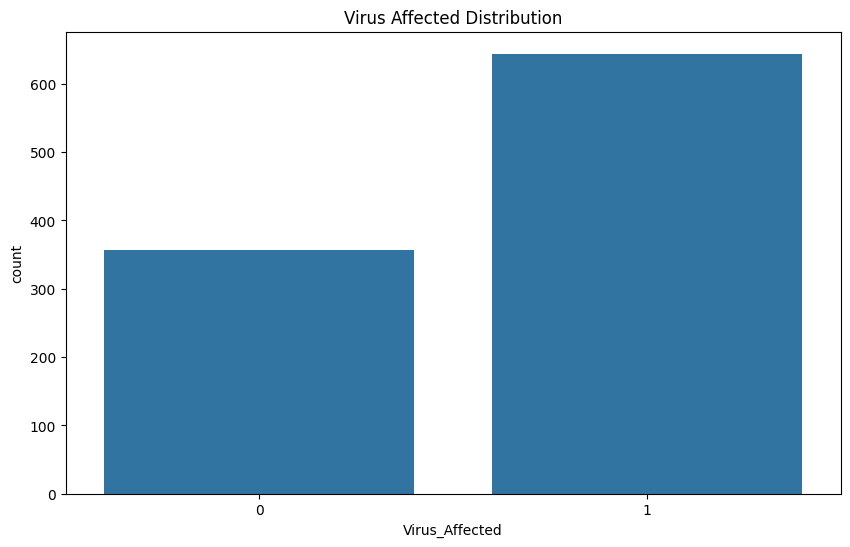

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Virus_Affected', data=df)
plt.title('Virus Affected Distribution')
plt.show()

# Correlation heatmap

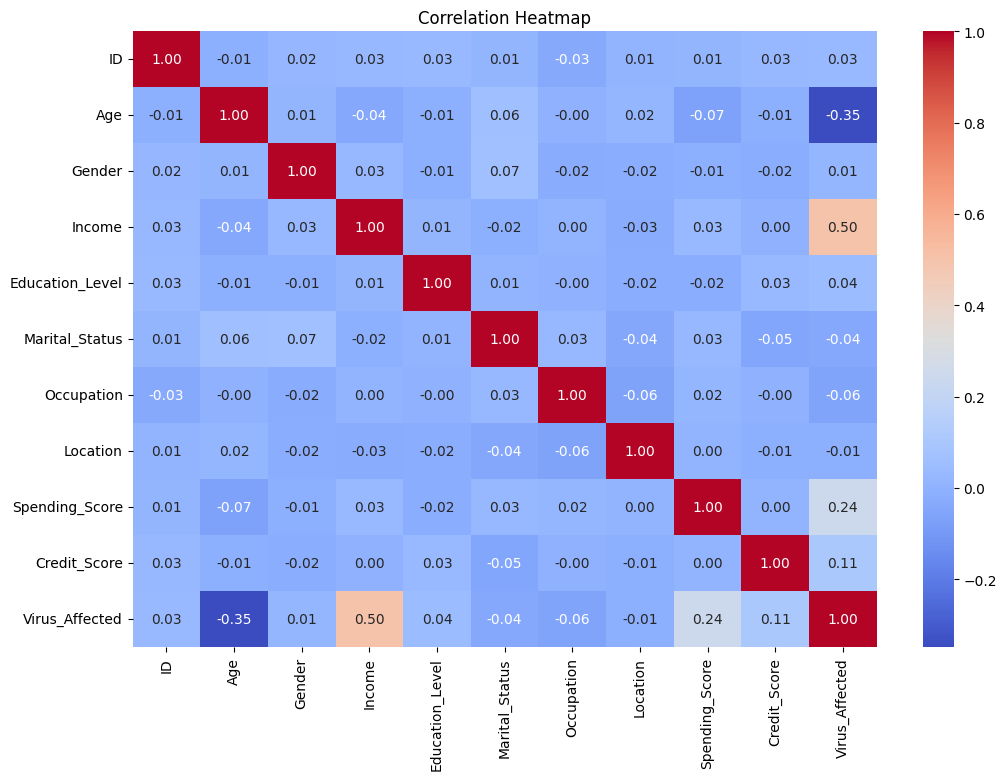

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [12]:
# Feature selection (assuming 'target' is the target variable)
X = df.drop(columns=['Virus_Affected'])
y = df['Virus_Affected']

# Split the data into training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Evaluation

In [15]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Training, predicting, and evaluating each model

In [16]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n{name} Accuracy: {accuracy:.2f}')
    print(f'{name} Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.81
Logistic Regression Confusion Matrix:
[[ 51  20]
 [ 17 112]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73        71
           1       0.85      0.87      0.86       129

    accuracy                           0.81       200
   macro avg       0.80      0.79      0.80       200
weighted avg       0.81      0.81      0.81       200


Random Forest Accuracy: 0.99
Random Forest Confusion Matrix:
[[ 71   0]
 [  2 127]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.98      0.99       129

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200


Support Vector Machine Accuracy: 0.82
Support Vector Machine Confusion Matrix:
[[ 5

In [17]:
    # Feature Importance or Coefficients
    if name == 'Random Forest':
        feature_importances = model.feature_importances_
        feature_importances = pd.Series(feature_importances, index=X.columns)
        feature_importances = feature_importances.sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importances, y=feature_importances.index)
        plt.title(f'Feature Importance - {name}')
        plt.show()

    elif name == 'Logistic Regression':
        feature_importances = model.coef_[0]
        feature_importances = pd.Series(feature_importances, index=X.columns)
        feature_importances = feature_importances.sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importances, y=feature_importances.index)
        plt.title(f'Feature Importance (Coefficients) - {name}')
        plt.show()

    elif name == 'Support Vector Machine':
        feature_importances = model.coef_[0]
        feature_importances = pd.Series(feature_importances, index=X.columns)
        feature_importances = feature_importances.sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importances, y=feature_importances.index)
        plt.title(f'Feature Importance (Coefficients) - {name}')
        plt.show()

    elif name == 'K-Nearest Neighbors':
        print(f'{name} does not provide feature importance directly.')

K-Nearest Neighbors does not provide feature importance directly.


# Extract feature importance and coefficients

In [18]:
feature_importance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    if name == 'Random Forest':
        importances = model.feature_importances_
        feature_importance[name] = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    elif name in ['Logistic Regression', 'Support Vector Machine']:
        coef = model.coef_[0]
        feature_importance[name] = pd.Series(coef, index=X.columns).sort_values(ascending=False)

# Display feature importance or coefficients

In [19]:
for name, importance in feature_importance.items():
    print(f'\n{name} Feature Importance / Coefficients:')
    print(importance)


Logistic Regression Feature Importance / Coefficients:
Income             1.718453
Spending_Score     0.830295
Credit_Score       0.326622
Location           0.085061
Education_Level    0.070834
Gender             0.060771
ID                 0.031407
Marital_Status    -0.101491
Occupation        -0.209453
Age               -1.056008
dtype: float64

Random Forest Feature Importance / Coefficients:
Income             0.449353
Age                0.244298
Spending_Score     0.164012
Credit_Score       0.049161
ID                 0.032764
Occupation         0.031699
Marital_Status     0.008803
Location           0.008736
Education_Level    0.008033
Gender             0.003141
dtype: float64

Support Vector Machine Feature Importance / Coefficients:
Income             1.370927
Spending_Score     0.604595
Credit_Score       0.323274
Location           0.067957
ID                 0.056155
Gender             0.045162
Education_Level   -0.005438
Marital_Status    -0.058264
Occupation        -0.

In [20]:
# Identify the top 2 features from each model
top_features = {name: importance.index[:2].tolist() for name, importance in feature_importance.items()}

print("\nTop 2 Features for each model:")
print(top_features)


Top 2 Features for each model:
{'Logistic Regression': ['Income', 'Spending_Score'], 'Random Forest': ['Income', 'Age'], 'Support Vector Machine': ['Income', 'Spending_Score']}


# Cross-validation for model comparison

In [21]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f'\n{name} Cross-Validation Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})')


Logistic Regression Cross-Validation Accuracy: 0.81 (+/- 0.04)

Random Forest Cross-Validation Accuracy: 0.98 (+/- 0.01)

Support Vector Machine Cross-Validation Accuracy: 0.80 (+/- 0.04)

K-Nearest Neighbors Cross-Validation Accuracy: 0.83 (+/- 0.01)
